In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data_to_load = pd.read_csv("data/city_data.csv") 
ride_data_to_load = pd.read_csv ("data/ride_data.csv")

In [4]:
df = pd.merge ( city_data_to_load, ride_data_to_load, on = "city")

In [5]:
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
FareGrouped = df["fare"].groupby([df["type"],df["city"]])

In [7]:
AverageFare = FareGrouped.mean()

In [8]:
DriverCountGrouped = df["driver_count"].groupby([df["type"],df["city"]])

In [9]:
size =DriverCountGrouped.size()

In [10]:
city_type = df["type"].unique()

In [11]:
city_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

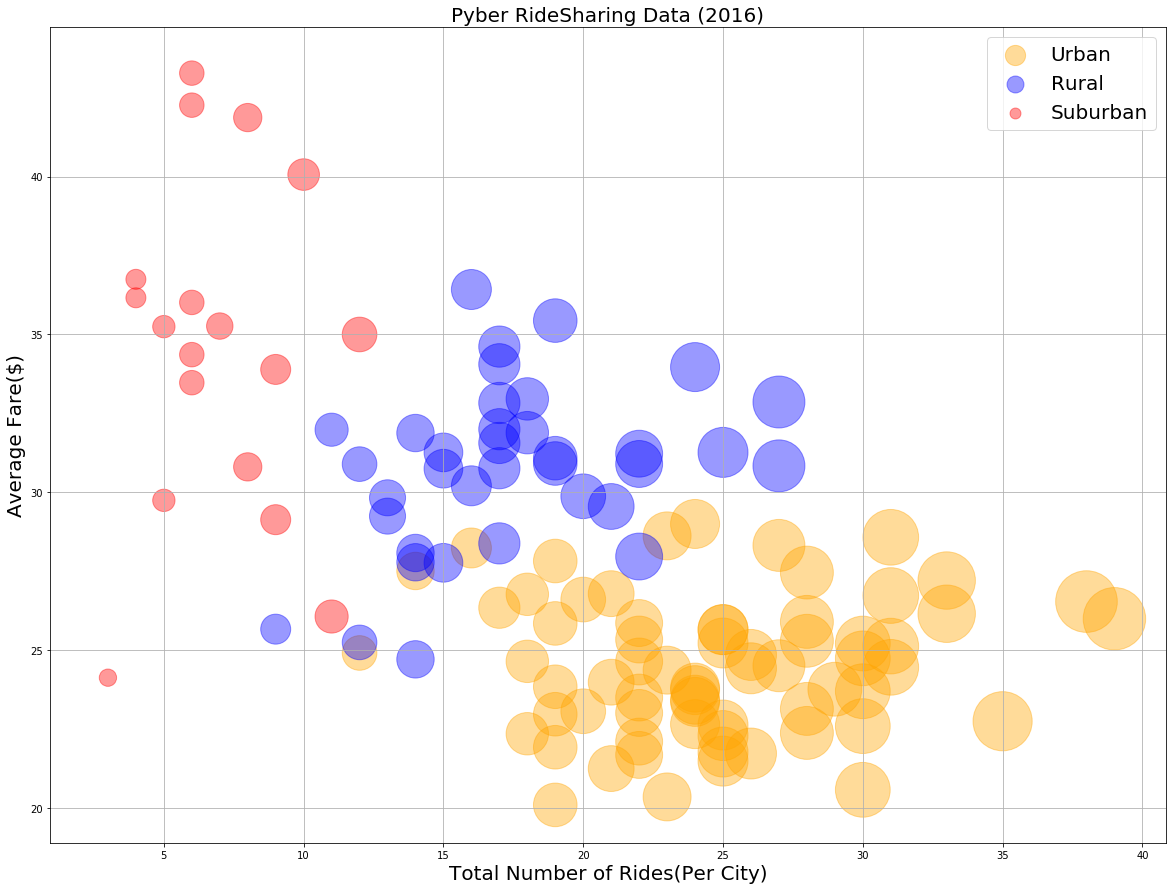

In [12]:
plt.figure(figsize=(20,15))
plt.scatter(size[city_type[0]],AverageFare[city_type[0]], c = "orange", s = size[city_type[0]]*100, alpha=0.4, 
            label='Urban')
plt.scatter(size[city_type[1]], AverageFare[city_type[1]], c = "blue", s = size[city_type[1]]*100, alpha=0.4,
           label='Rural')
plt.scatter(size[city_type[2]],AverageFare[city_type[2]], c = "red", s = size[city_type[2]]*100, alpha=0.4,
           label='Suburban')

plt.legend(loc='upper right', fontsize =20, markerscale =.4)


plt.title('Pyber RideSharing Data (2016)', fontsize=20)
plt.xlabel('Total Number of Rides(Per City)', fontsize=20)
plt.ylabel('Average Fare($)', fontsize=20)
plt.grid()

In [13]:
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [14]:
FarebyType = df["fare"].groupby([df["type"]])

In [43]:
FateCityTypeValues = FarebyType.sum().values

In [44]:
PercentageTotalFare = []
for f in FateCityTypeValues:
    x =  (f / sum (FateCityTypeValues))*100
    PercentageTotalFare.append (x)

In [45]:
PercentageTotalFare

[6.8114929749834126, 30.463872062732218, 62.72463496228438]

In [46]:
FateCityTypeValues

array([ 4327.93, 19356.33, 39854.38])

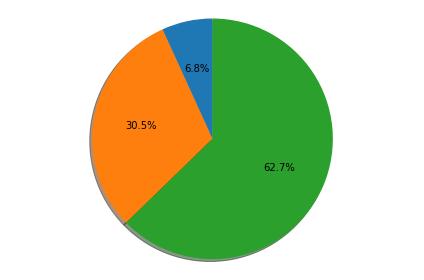

In [47]:
plt.pie (PercentageTotalFare,startangle=90, autopct='%.1f%%',  shadow=True)
plt.axis('equal')
plt.tight_layout()

In [51]:
RidesperCity = FarebyType.size().values

In [53]:
PercetageRidesperCity= []
for r in RidesperCity:
    x = (r/sum(RidesperCity))*100
    PercetageRidesperCity.append (x)
    

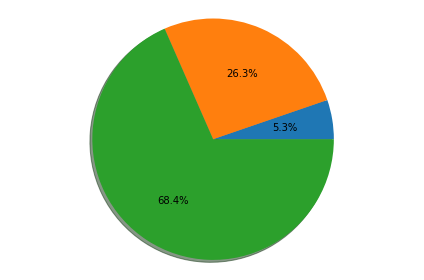

In [56]:
plt.pie (PercetageRidesperCity, autopct='%.1f%%',  shadow=True)
plt.axis('equal')
plt.tight_layout()

In [89]:
city_type = df["type"].unique()

In [91]:
city_type[0]

'Urban'

In [112]:
urban_cities = df[df["type"]==city_type[0]]

In [115]:
urban_cities_list = urban_cities["city"].unique()

In [128]:
urban_cities[urban_cities["city"]==urban_cities_list[0]].iloc[0,1]

38

In [131]:
utbanDrivers= []
for i in range(len(urban_cities_list)) :
    x = urban_cities[urban_cities["city"]==urban_cities_list[i]].iloc[0,1]
    utbanDrivers.append (x)

In [135]:
totalUrbanDriers = sum (utbanDrivers)

In [136]:
totalUrbanDriers

2405

In [138]:
city_type[1]

'Suburban'

In [139]:
suburban_cities = df[df["type"]==city_type[1]]

In [144]:
suburban_cities_list = suburban_cities["city"].unique()

In [149]:
SuburbanDrivers = []
for i in range (len(suburban_cities_list)):
    x = suburban_cities[suburban_cities["city"]==suburban_cities_list[i]].iloc[0,1]
    SuburbanDrivers.append (x)
    

In [152]:
TotalSuburbanDrivers = sum (totalSuburbanDrivers)

In [156]:
city_type[2]

'Rural'

In [159]:
ruralCities = df[df["type"]==city_type[2]]

In [162]:
ruralCitiesList = ruralCities["city"].unique()

In [164]:
ruralDrivers = []
for i in range(len(ruralCitiesList)):
    x = ruralCities[ruralCities["city"]==ruralCitiesList[i]].iloc[0,1]
    ruralDrivers.append (x)

In [166]:
totaRuralDrivers = sum(ruralDrivers)

In [172]:
totalNumberDrivers = sum ([totaRuralDrivers,TotalSuburbanDrivers, totalUrbanDriers ])

In [178]:
percentageUrbanDrivers = (totalUrbanDriers/totalNumberDrivers)*100
percentageSubUrbanDrivers = (TotalSuburbanDrivers/totalNumberDrivers)*100
percentageRuralDrivers =  (totaRuralDrivers/totalNumberDrivers)*100
DriversPercetanges=  percentageUrbanDrivers, percentageSubUrbanDrivers, percentageRuralDrivers

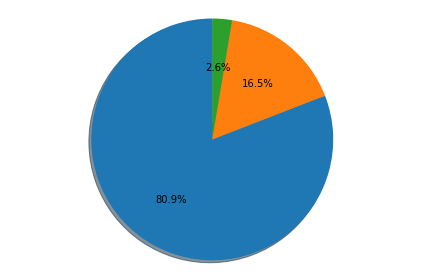

In [181]:
plt.pie (DriversPercetanges, startangle=90, autopct='%.1f%%',  shadow=True )
plt.axis('equal')
plt.tight_layout()